# Anemômetro utilizando termistor

Este notebook modela um anemômetro utilizando um termistor aquecido pela corrente elétrica passando por ele e esfriado pelo escoamento ao redor do mesmo.

A resistência elétrica do termistor varia de acordo com a seguinte relação

$$
R = R_0\exp\left[ B \cdot \left(\frac{1}{T} - \frac{1}{T_0} \right) \right]
$$

Onde 
 * $T$ é a temperatura do termistor em K
 * $T_0$ é a temperatura de referência em K
 * $R_0$ é a resistência do termistor à temperature de referência $T_0$
 * $B$ é um coeficiente empírico com unidade 1/K
 

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
include("../src/ThermistorHW.jl")
using ThermistorHW

## Verificando o comportamento do Termistor NTC

Vamos modelar um termistor com as seguintes características:

 * $T_0 = 20^\circ C$
 * $R_0 = 5000\:\Omega$
 * $B = 3200\:K^{-1}$
 

In [3]:
R = Thermistor(5e3, 3000, 20)

ThermistorHW.Thermistor(5000.0, 3000.0, 293.15)

In [4]:
T = 0.0:0.5:120.0
r = R.(T); R₀

LoadError: [91mUndefVarError: R₀ not defined[39m

In [5]:
plot(T, r, xlab="Temperature (°C)", ylab="Resistance (Ω)",
    label="Thermistor R₀ = 5kΩ, B = 3000 K", title="Resistance of a Thermistor")

savefig("../figures/thermistor.pdf")



## Funcionamento de um anomômetro

O calor gerado pela corrente elétrica no termistor é transferido por convecção para o escoamento ao seu redor:

$$
R(T)\cdot I^2 = h\cdot A\cdot \left(T - T_\infty\right)
$$

Lembrando que $h$ depende da velocidade, esta equação pode ser resolvida. Existem dois modos básicos de operação:

 * Corrente constante, onde I é conhecida e deve-se determinar a temperatura do termistor
 * Temperatura constante, onde T é conhecida e deve-se determinar a corrente
 
 É interessante observar que apesar da eletrônica do modo corrente constante ser muito mais simples, neste modelo é necessário usar um esquema iterativo para calcular a temperatura. Por outro lado, o modelo com temperatura constante é direto.

## Temperatura constante

In [6]:
R = Thermistor(5e3, 3000)
Pa = 93.0 # kPa, pressão atmosférica
Ta = 20.0 # Temperatura ambiente
U = 0.5:0.1:30


0.5:0.1:30.0

In [7]:
a1 = const_temperature.(90.0, R, U, 2.0, Ta, Pa);
a2 = const_temperature.(90.0, R, U, 3.0, Ta, Pa);
a3 = const_temperature.(80.0, R, U, 2.0, Ta, Pa);
a4 = const_temperature.(90.0, R, U, 2.0, Ta+2.0, Pa)
a5 = const_temperature.(80.0, R, U, 2.0, Ta+2.0, Pa)
E1 = [x.E for x in a1]
I1 = [1000*x.I for x in a1]
E2 = [x.E for x in a2]
I2 = [1000*x.I for x in a2]
E3 = [x.E for x in a3]
I3 = [1000*x.I for x in a3];
E4 = [x.E for x in a4]
I4 = [1000*x.I for x in a4];
E5 = [x.E for x in a5]
I5 = [1000*x.I for x in a5];


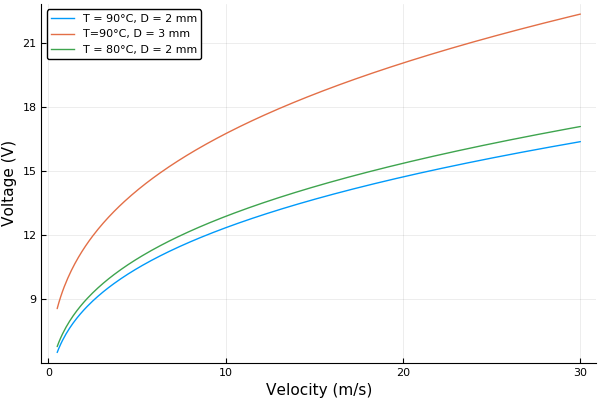

In [8]:
plot(U, E1, xlab="Velocity (m/s)", 
    ylab="Voltage (V)", title="", 
    label="T = 90°C, D = 2 mm")
plot!(U, E2, label="T=90°C, D = 3 mm")
plot!(U, E3, label="T = 80°C, D = 2 mm")

#savefig("../figures/CTA-Eo.pdf")

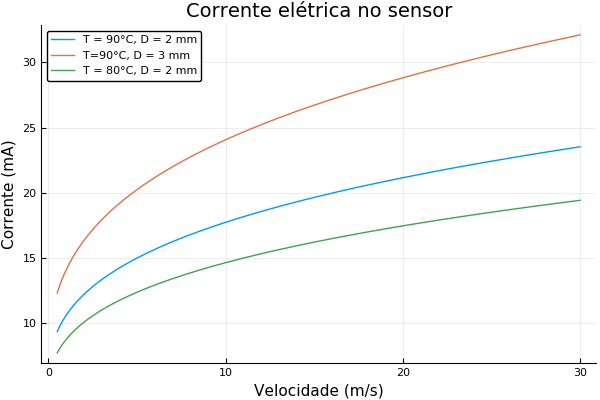

In [9]:
plot(U, I1, xlab="Velocidade (m/s)", 
    ylab="Corrente (mA)", title="Corrente elétrica no sensor", 
    label="T = 90°C, D = 2 mm")
plot!(U, I2, label="T=90°C, D = 3 mm")
plot!(U, I3, label="T = 80°C, D = 2 mm")

#savefig("../figures/CTA-I.pdf")

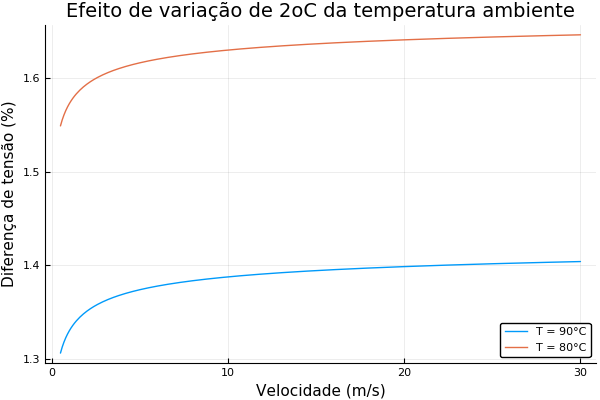

In [10]:
ea = (E1 - E4) ./ E1 * 100
eb = (E3 - E5) ./ E3 * 100

plot(U, ea, xlab="Velocidade (m/s)", 
    ylab="Diferença de tensão (%)", title="Efeito de variação de 2oC da temperatura ambiente",
    label="T = 90°C")
plot!(U, eb, label="T = 80°C")

In [11]:
p1 = plot(U, E1, xlab="Velocity (m/s)", 
        ylab="Voltage (V)", title="(a) Voltage output", 
    label="T = 90°C, D = 2 mm")
plot!(U, E2, label="T=90°C, D = 3 mm")
plot!(U, E3, label="T = 80°C, D = 2 mm")

p2 = plot(U, ea, xlab="Velocity (m/s)", 
    ylab="Voltage Difference (%)", title="(b) Effect of room temp.",
    label="T = 90°C")
plot!(U, eb, label="T = 80°C")

pp = plot(p1,p2, layout=(1,2), legend=false)


savefig(pp, "../figures/CTA.pdf")

### Conclusões

Os gráficos acima mostram que o comportamento do sensor é não linear e 

$$
E \sim \sqrt{U}
$$
Isto é interessante pois quanto menor a velocidade, mais sensível é o instrumento. Por outro lado, a convecção natural limita isso. 

Os gráficos acima mostram que quanto maior a temperatura de operação maior a sensibilidade mas maior a corrente. Por outro lado, quanto menor a temperatura, maior a sensibilidade em relação à temperatura ambiente o que é ruim

Por outro lado reduzir o diâmetro possui uma vantagem considerável: limitam-se as tensões e principalmente a corrente. Isto é muito interessante para sistemas que trabalham com baterias.



## Corrente constante

In [12]:
R = Thermistor(5e3, 3000)
Pa = 93.0 # kPa, pressão atmosférica
Ta = 20.0 # Temperatura ambiente
U = 0.5:0.1:30


0.5:0.1:30.0

In [26]:
b1 = const_current.(0.5, R, U, 2.0, Ta, Pa);
b2 = const_current.(20, R, U, 2.0, Ta, Pa);
b3 = const_current.(25, R, U, 2.0, Ta+2, Pa);
b4 = const_current.(20, R, U, 2.0, Ta+2, Pa);
b5 = const_current.(15, R, U, 2.0, Ta, Pa);
b6 = const_current.(15, R, U, 2.0, Ta+2, Pa);

E1 = [x.E for x in b1];
E2 = [x.E for x in b2];
E3 = [x.E for x in b3];
E4 = [x.E for x in b4];
E5 = [x.E for x in b5];
E6 = [x.E for x in b6];

T1 = [x.T for x in b1];
T2 = [x.T for x in b2];
T3 = [x.T for x in b3];
T4 = [x.T for x in b4];
T5 = [x.T for x in b5];
T6 = [x.T for x in b6];

ea = (E1 - E3) ./ E1 * 100;
eb = (E2 - E4) ./ E1 * 100;
ec = (E5 - E6) ./ E1 * 100;


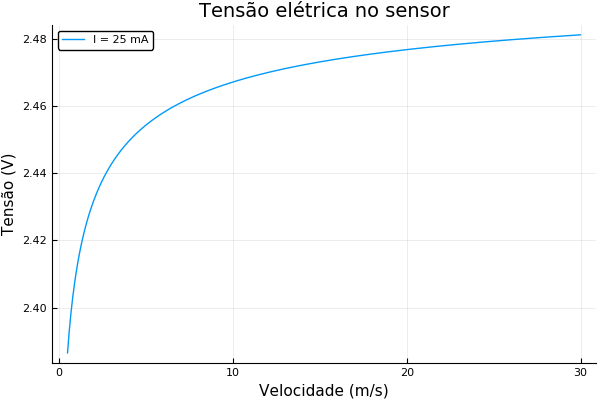

In [27]:
plot(U, E1, xlab="Velocidade (m/s)", 
    ylab="Tensão (V)", title="Tensão elétrica no sensor", 
    label="I = 25 mA")
#plot!(U, E2, label="I = 20 mA")
#plot!(U, E5, label="I = 15 mA")


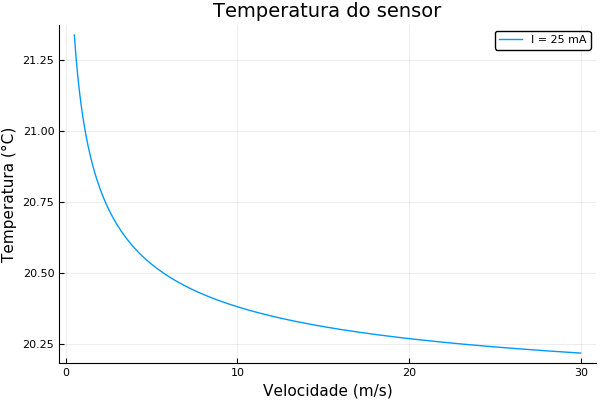

In [28]:
plot(U, T1, xlab="Velocidade (m/s)", 
    ylab="Temperatura (°C)", title="Temperatura do sensor", 
    label="I = 25 mA")
#plot!(U, T2, label="I = 20 mA")
#plot!(U, T5, label="I = 15 mA")

In [ ]:
plot(U, ea, xlab="Velocidade (m/s)", 
    ylab="Diferença de tensão (%)", title="Efeito de variação de 2oC da temperatura ambiente",
    label="I = 25 mA")
plot!(U, eb, label="I = 20 mA")
plot!(U, ec, label="I = 15 mA")

In [ ]:
p1 = plot(U, E1, xlab="Velocity (m/s)", 
    ylab="Voltage (V)", title="Voltage output", 
    label="I = 25 mA")
plot!(U, E2, label="I = 20 mA")
plot!(U, E5, label="I = 15 mA")



p2 = plot(U, T1, xlab="Velocity (m/s)", 
    ylab="Temperature (°C)", title="Thermistor temperature", 
    label="I = 25 mA")
plot!(U, T2, label="I = 20 mA")
plot!(U, T5, label="I = 15 mA")

pp = plot(p1, p2, layout=(1,2))
savefig(pp, "../figures/CCA.pdf")


### Conclusões

O comportamento é bem parecido em geral com o caso com temperatura constante. Talvez os aspecto mais importante seja a variação acentuada da temperatura o que pode causar algumas dificuldades. Um problema é a temperatura excessiva em baixas velocidades o que pode causar danos ao termistor mas atingir altas temperaturas é o único jeito de se conseguir sensibilidade nas velocidades mais altas.